In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Distance: 2.5689149659863943m
Default Distance: 2.5571309523809522m


/home/david/.virtualenvs/sonarapp-utils/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/david/.virtualenvs/sonarapp-utils/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


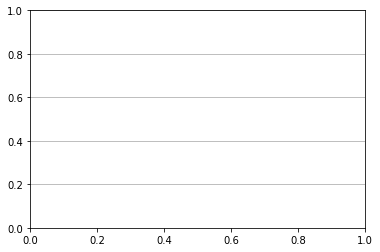

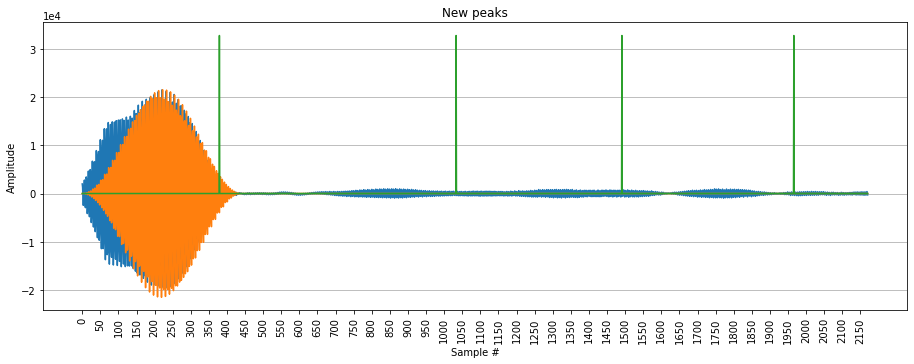

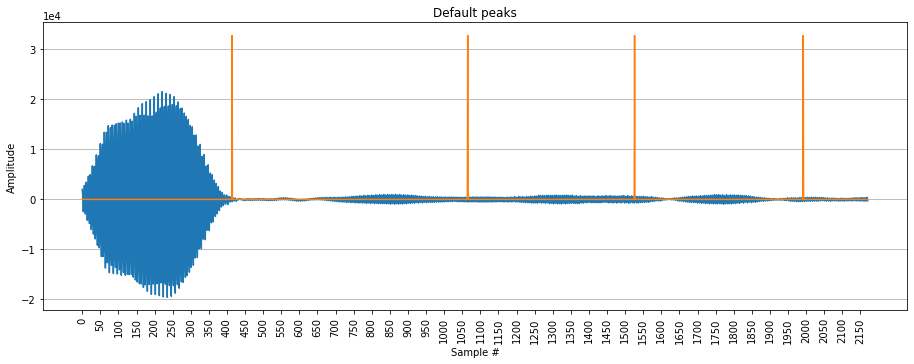

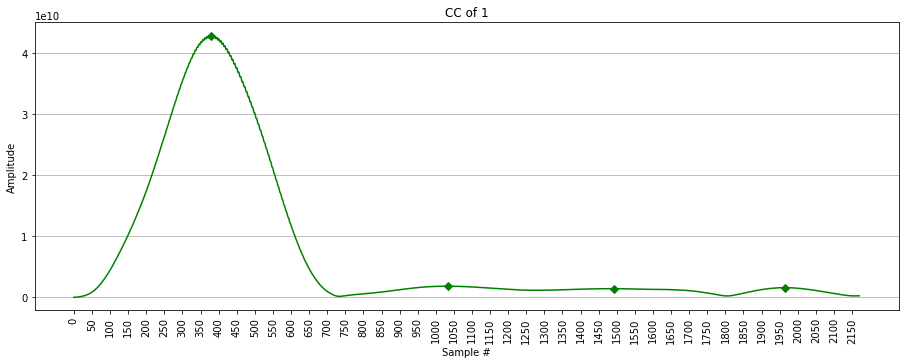

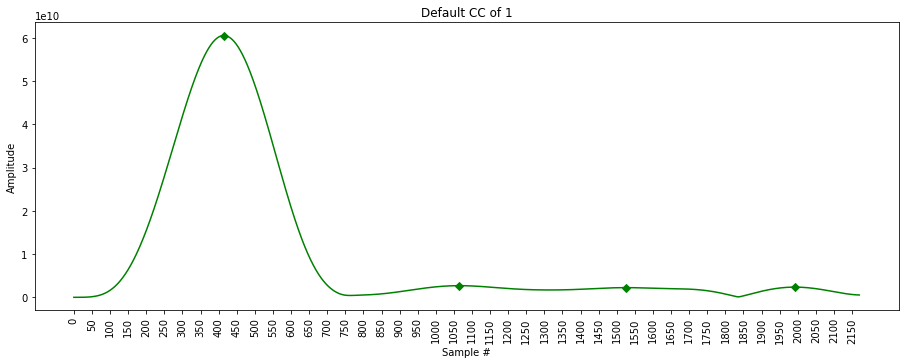

In [59]:
%matplotlib inline

import numpy as np
from scipy import signal

import analysis as an
import cross_correlation_analyzer as cca

threshold = 1e9
for i in range(1, 2):
    recording = an.load_recording(i)
    chirp_peak = np.argmax(recording)
    chirp_duration_in_frames = int(
        np.floor(an.CHIRP_DURATION * an.SAMPLE_RATE))
    half_chirp = np.floor(chirp_duration_in_frames * 0.5)

    chirp_start = int(chirp_peak - half_chirp)
    recorded_chirp = recording[
                     chirp_start:chirp_start + chirp_duration_in_frames]
    default_chirp = an.get_chirp()
    # scale chirp
    default_chirp *= recording[chirp_peak] / np.max(default_chirp)
    default_chirp = default_chirp.tolist()

    trimmed_recording = an.trim(recording)
    cc = cca.calc_cross_correlation_scipy(trimmed_recording,
                                          recorded_chirp)[
         :len(trimmed_recording)]
    cc_default_chirp = cca.calc_cross_correlation_scipy(trimmed_recording)[
                       :len(trimmed_recording)]

    _, _, distance, peaks = cca.get_distances(cc, threshold)
    _, _, default_distance, default_peaks = cca.get_distances(
        cc_default_chirp, threshold)

    print("Distance: {}m".format(distance))
    print("Default Distance: {}m".format(default_distance))
    
    x_recording = list(range(len(trimmed_recording)))

    fig_recording = an.get_graph_figure(trimmed_recording, 'New peaks')
    y_chirp = default_chirp + [0] * (
                len(trimmed_recording) - len(default_chirp))
    fig_chirp = an.get_graph_figure(
        y_chirp, 'Default chirp', x=x_recording, fig=fig_recording)
    y_peaks = [an.JAVA_SHORT_MAX if y in peaks else 0
               for y in x_recording]
    an.get_graph_figure(
        y_peaks, 'New peaks', x=x_recording, fig=fig_chirp).show()

    fig_recording = an.get_graph_figure(trimmed_recording, 'Default peaks')
    y_peaks = [an.JAVA_SHORT_MAX if y in default_peaks else 0
               for y in x_recording]
    an.get_graph_figure(
        y_peaks, 'Default peaks', x=x_recording, fig=fig_recording).show()

    an.get_graph_figure(cc, 'CC of {0}'.format(i), markers=peaks)
    an.get_graph_figure(
        cc_default_chirp, 'Default CC of {0}'.format(i),
        markers=default_peaks)